# Importing all the Libraries 

In [1]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from skimage import feature
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
#Connecting the colab with my Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from mlxtend.data import loadlocal_mnist

# Loading the dataset from my Drive and Initialising the Data 

In [4]:
train_image_path = '/content/gdrive/My Drive/DeepLearning_A1/dataset/train-images-idx3-ubyte'
train_label_path = '/content/gdrive/My Drive/DeepLearning_A1/dataset/train-labels-idx1-ubyte' 
test_image_path = '/content/gdrive/My Drive/DeepLearning_A1/dataset/t10k-images-idx3-ubyte'
test_label_path = '/content/gdrive/My Drive/DeepLearning_A1/dataset/t10k-labels-idx1-ubyte'

In [5]:
X_train, y_train = loadlocal_mnist(images_path= train_image_path, labels_path= train_label_path)
X_test, y_test = loadlocal_mnist(images_path= test_image_path, labels_path= test_label_path)

labelNames = ["zero","one","two","three","four","five","six","seven","eight","nine"]

In [7]:
print(np.shape(X_train))
print(np.shape(X_test))

(60000, 784)
(10000, 784)


In [8]:
X_train = X_train.reshape(-1,28,28)
X_test = X_test.reshape(-1,28,28)

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


# Local Binary Patterns for Feature Extraction

In [9]:
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
 
	def LBPfeatures(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
    # Form the histogram
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
 
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
 
		# return the histogram of Local Binary Patterns
		return hist

In [10]:
# Create an object of LocalBinaryPatterns class and initial the parameters.
desc = LocalBinaryPatterns(24, 8)
data_train = []
labels_train = []

# loop over the training images
for img_index in range(len(X_train)):
	# load the train image, and extract LBP features
	image = X_train[img_index]
	hist = desc.LBPfeatures(image)

	# extract the label from the image path, then update the
	# label and data lists
	labels_train.append(y_train[img_index])
	data_train.append(hist)

# Training the KNN Classifier with the training dataset and training Labels

In [11]:
KNNmodel = KNeighborsClassifier(n_neighbors=3)

KNNmodel.fit(data_train,labels_train)

accuracy = KNNmodel.score(data_train,labels_train)
print("Test set Accuracy: {:.2f}".format(KNNmodel.score(data_train,labels_train)))

Test set Accuracy: 0.65


# Evaluating the Performance of the trained Classifier with confusion matrix

In [12]:
predictions=[]
predict_label=[]
# Exract LBP features for each test sample and classify it with the trained KNN classifier

for im_index in range(len(X_test)):
  imag = X_test[im_index]
  
  # Extract LBP feature
  histo = desc.LBPfeatures(imag)
  # Perform classification
  prediction = KNNmodel.predict(histo.reshape(1,-1))
  
  # Store the classfication result
  predictions.append(prediction)
  predict_label.append(y_test[im_index])

In [13]:
print(np.shape(predictions))
print(np.shape(predict_label))

(10000, 1)
(10000,)


In [14]:
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.4369


[[ 872    0   10   23    6   41    4    1    4   19]
 [   0 1097    7    4    0    3    2   18    4    0]
 [  44   13  519  142   77   46   41   81   58   11]
 [  49   12  243  311   88   98   66   50   63   30]
 [  21    8  167  130  352   54   41   24   49  136]
 [ 136   16  173  194   63  129   44   75   30   32]
 [  61   11  267  182   80   70   99   48   80   60]
 [  22   62  158  125   74   86   40  424   11   26]
 [  45    4  174  182   77   29   72   18  338   35]
 [  67   23   63  177  229   70   90   25   37  228]]


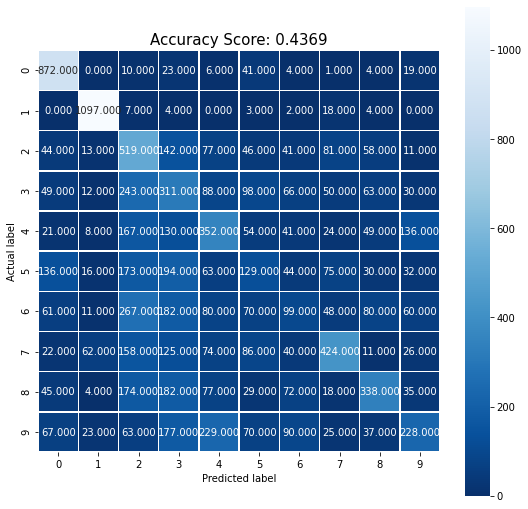

In [15]:

# plot the confusion matrix
cm  = metrics.confusion_matrix(y_test, predictions)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [16]:
# Display some classification result on test samples
images = []
 
# randomly select a few
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  # classify the numbers
  histog = desc.LBPfeatures(X_test[i])
  prediction = KNNmodel.predict(histog.reshape(1, -1))
  label = labelNames[prediction[0]]
  orig_label=labelNames[y_test[i]]
  image = X_test[i]
  color = (0, 255, 0)
  image = cv2.merge([image] * 3)
  image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(image)

In [17]:
np.shape(images[1])


(96, 96, 3)

# Visualisation of the classified results

three


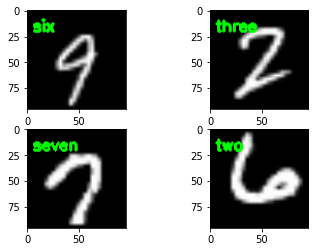

In [18]:
## Display the classification results
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_label[:])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])

# Feature Extraction using Histogram of Oriented Gradient 

In [19]:
# initialize the data matrix and labels
print("Extracting features from training dataset...")
data_train = []
labels_train = []

# loop over the training images
for img_index in range(len(X_train)):
  # load the image, and extract HOG features it
  image = X_train[img_index]
  
  H = feature.hog(image, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
 
  # update the data and labels
  data_train.append(H) 
  labels_train.append(y_train[img_index])  
print(np.shape(data_train))
print(np.shape(labels_train))

Extracting features from training dataset...
(60000, 36)
(60000,)


In [20]:
img_index

59999

# Training KNN classifier

In [21]:
KNNModel = KNeighborsClassifier(n_neighbors=3)

## 2.2 Fit the model to the training dataset
KNNmodel.fit(data_train, labels_train)

## 3. Calculate the train set accuracy 
print("Train set Accuracy: {:.2f}".format(KNNmodel.score(data_train,labels_train)))

Train set Accuracy: 0.93


# Evaluating the Performance of the trained Classifier with confusion matrix

In [22]:
print("Extracting features from test dataset...")
predict_test = []
labels_test = []
data_test=[]
# loop over the training images
for img_ind in range(len(X_test)):
  # load the image, and extract HOG features
  img=X_test[img_ind]
  H = feature.hog(img, orientations=9, pixels_per_cell=(10,10), cells_per_block=(2,2),
                  transform_sqrt=True, block_norm="L2-Hys")
  pred = KNNmodel.predict(H.reshape(1, -1))[0]
  # update the data and labels
  predict_test.append(pred)
  data_test.append(H)
  
  labels_test.append(y_test[img_ind])
  
print(np.shape(predict_test))
print(np.shape(labels_test))

Extracting features from test dataset...
(10000,)
(10000,)


In [23]:
# Test set Accuracy
accuracy = metrics.accuracy_score(y_test, predict_test)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.8676


[[ 904    5    6    2    1    5   20    2   17   18]
 [   5 1120    2    2    1    0    4    0    1    0]
 [  18    3  879   45    7    3    3   40   16   18]
 [   4    1   55  833    0   31    0   22   50   14]
 [   3    4   13    1  840    1  103    0    6   11]
 [   6    3   16   46    2  754   17    0   33   15]
 [  21    2    5    2   43   17  855    1    5    7]
 [  22    7   47   43    1    8    1  869    8   22]
 [  53    1   25   48    3   32   24    4  729   55]
 [  19    3    4   16    4   12   10    7   41  893]]


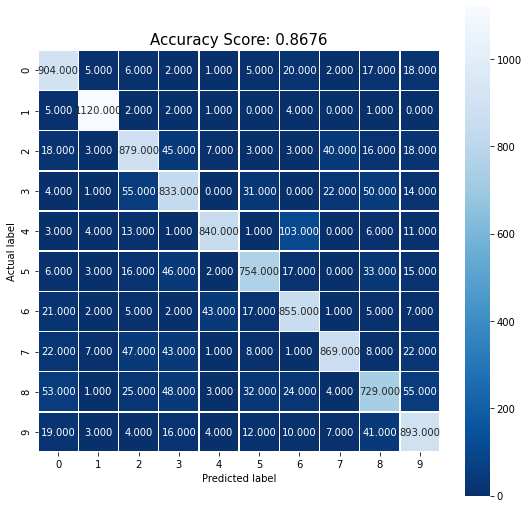

In [24]:
cm  = metrics.confusion_matrix(y_test, predict_test)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [25]:
images = []
orig_labels=[]
# randomly select a few testing numbers
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  # classify the numbers
  test_img = (X_test[i])
  H1 = feature.hog(test_img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = KNNmodel.predict(H1.reshape(1, -1))[0]
  label = labelNames[pred]
  orig_labels.append(labelNames[y_test[i]])
  color = (0, 255, 0)
  test_img = cv2.merge([test_img] * 3)
  test_img = cv2.resize(test_img, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(test_img, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(test_img)

In [26]:
orig_labels[1]


'four'

four
three
four
nine


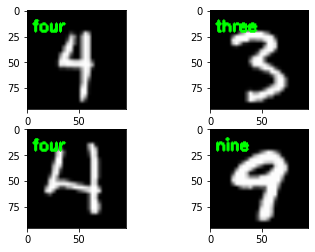

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_labels[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
print(orig_labels[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[10])
print(orig_labels[10])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])
print(orig_labels[4])

# Training the KNN Classifier using RAW dataset and evaluating 

In [28]:
X_train, y_train = loadlocal_mnist(images_path= train_image_path, labels_path= train_label_path)
X_test, y_test = loadlocal_mnist(images_path= test_image_path, labels_path= test_label_path)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)

print(np.shape(X_train))
print(np.shape(y_train))


(60000, 784)
(60000,)


In [29]:
# Check the training accuray
print("Train set Accuracy: {:.2f}".format(clf.score(X_train,y_train)))

Train set Accuracy: 0.99


In [30]:
predictions=[]
predict_label=[]
# Exract LBP features for each test sample and classify it with the trained KNN classifier

for im_index in range(len(X_test)):
  imag = X_test[im_index]
  
  prediction = clf.predict(imag.reshape(1,-1))
  
  # Store the classfication result
  predictions.append(prediction)
  predict_label.append(y_test[im_index])


In [31]:
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.9705


[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    9  996    2    0    0    0   13    2    0]
 [   0    2    4  976    1   13    1    7    3    3]
 [   1    6    0    0  950    0    4    2    0   19]
 [   6    1    0   11    2  859    5    1    3    4]
 [   5    3    0    0    3    3  944    0    0    0]
 [   0   21    5    0    1    0    0  991    0   10]
 [   8    2    4   16    8   11    3    4  914    4]
 [   4    5    2    8    9    2    1    8    2  968]]


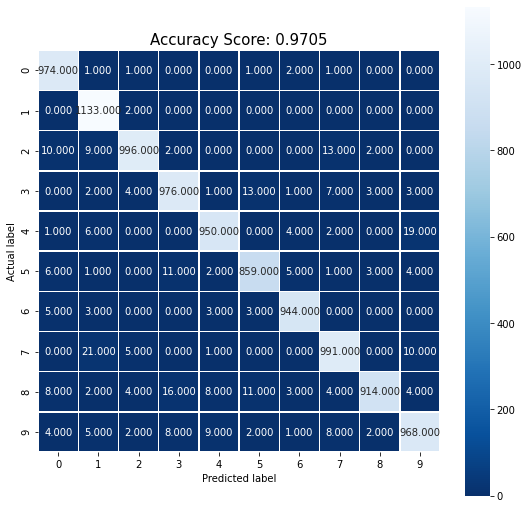

In [32]:

# plot the confusion matrix
cm  = metrics.confusion_matrix(y_test, predictions)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);